In [1]:
from keras.layers import Dense,Flatten,Lambda,Input,GlobalMaxPool2D,GlobalAveragePooling2D,Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.applications.xception import Xception

In [2]:
Image_size=[224,224]

In [3]:
vgg=VGG16(include_top=False,input_shape=Image_size+[3],weights='imagenet')

In [4]:
for layer in vgg.layers:
    layer.trainable=False

In [5]:
main_model = Flatten()(vgg.output)
main_model=Dense(256,activation='relu')(main_model)
main_model=Dropout(0.4)(main_model)
main_model = Dense(128,activation='relu',kernel_regularizer='l2')(main_model)
prediction = Dense(2,activation='softmax')(main_model)

In [6]:
model=Model(vgg.input,prediction)

In [7]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [8]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [9]:
from keras.models import load_model

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_data=ImageDataGenerator(rotation_range = 30, zoom_range = 0.20, 
fill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, 
width_shift_range = 0.1, height_shift_range = 0.1,rescale=1.0/255)

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
train_set=train_data.flow_from_directory('Dataset/Train',target_size=(224,224),batch_size=2,class_mode='categorical')

Found 67 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 2,
                                            class_mode = 'categorical')

Found 24 images belonging to 2 classes.


In [15]:
r = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=8,steps_per_epoch=len(train_set)//2,
    validation_steps=len(test_set)//2

)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/8
17/17 [==============================] - 7s 404ms/step - loss: 4.2065 - accuracy: 0.5000 - val_loss: 2.7487 - val_accuracy: 0.6667
Epoch 2/8
17/17 [==============================] - 7s 406ms/step - loss: 4.2407 - accuracy: 0.5758 - val_loss: 1.5015 - val_accuracy: 0.9167
Epoch 3/8
17/17 [==============================] - 7s 400ms/step - loss: 4.6179 - accuracy: 0.5758 - val_loss: 0.8694 - val_accuracy: 1.0000
Epoch 4/8
17/17 [==============================] - 7s 415ms/step - loss: 4.3349 - accuracy: 0.5882 - val_loss: 1.5421 - val_accuracy: 0.7500
Epoch 5/8
17/17 [==============================] - 7s 427ms/step - loss: 2.1640 - accuracy: 0.7941 - val_loss: 0.9094 - val_accuracy: 0.9167
Epoch 6/8
17/17 [==============================] - 7s 424ms/step - loss: 1.1094 - accuracy: 0.7941 - val_loss: 0.6152 - val_accuracy: 1.0000
Epoch 7/8
17/17 [==============================] - 8s 444ms/step - loss: 1.145

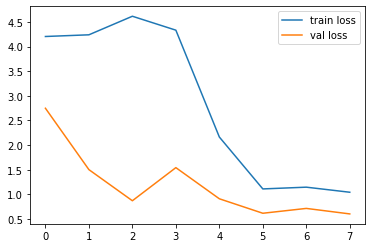

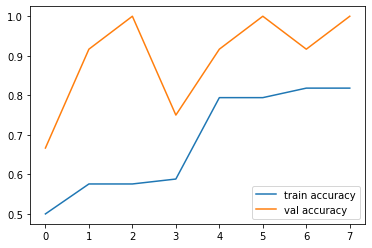

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_models.h5')

In [17]:
from keras.preprocessing.image import img_to_array

In [18]:
from keras.preprocessing.image import load_img

In [19]:
def image_gen(image):
    x=load_img(image,target_size=(224,224))
    x=img_to_array(x)
    x=x/255
    x=x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
    return x
    